# Evolution of a golfhandicap
##### _by Koen Ponnet_

>Before I start off, I want to share with you some interesting guiding tips I have found in the help section:  
><ol>
><li> Beautiful is better than ugly. </li>
><li> Explicit is better than implicit. </li>
><li> Simple is better than complex. </li>
><li> Complex is better than complicated. </li>
><li> Flat is better than nested. </li>
><li> Sparse is better than dense. </li>
><li> Readability counts. </li>
><li> Special cases aren't special enough to break the rules. </li>
><li> Although practicality beats purity. </li>
><li> Errors should never pass silently. </li>
><li> Unless explicitly silenced. </li>
><li> In the face of ambiguity, refuse the temptation to guess. </li>
><li> There should be one-- and preferably only one --obvious way to do it. </li>
><li> Although that way may not be obvious at first unless you're Dutch. </li>
><li> Now is better than never. </li>
><li> Although never is often better than right now. </li>
><li> If the implementation is hard to explain, it's a bad idea. </li>
><li> If the implementation is easy to explain, it may be a good idea. </li>
><li> Namespaces are one honking great idea -- let's do more of those!</li>
></ol>

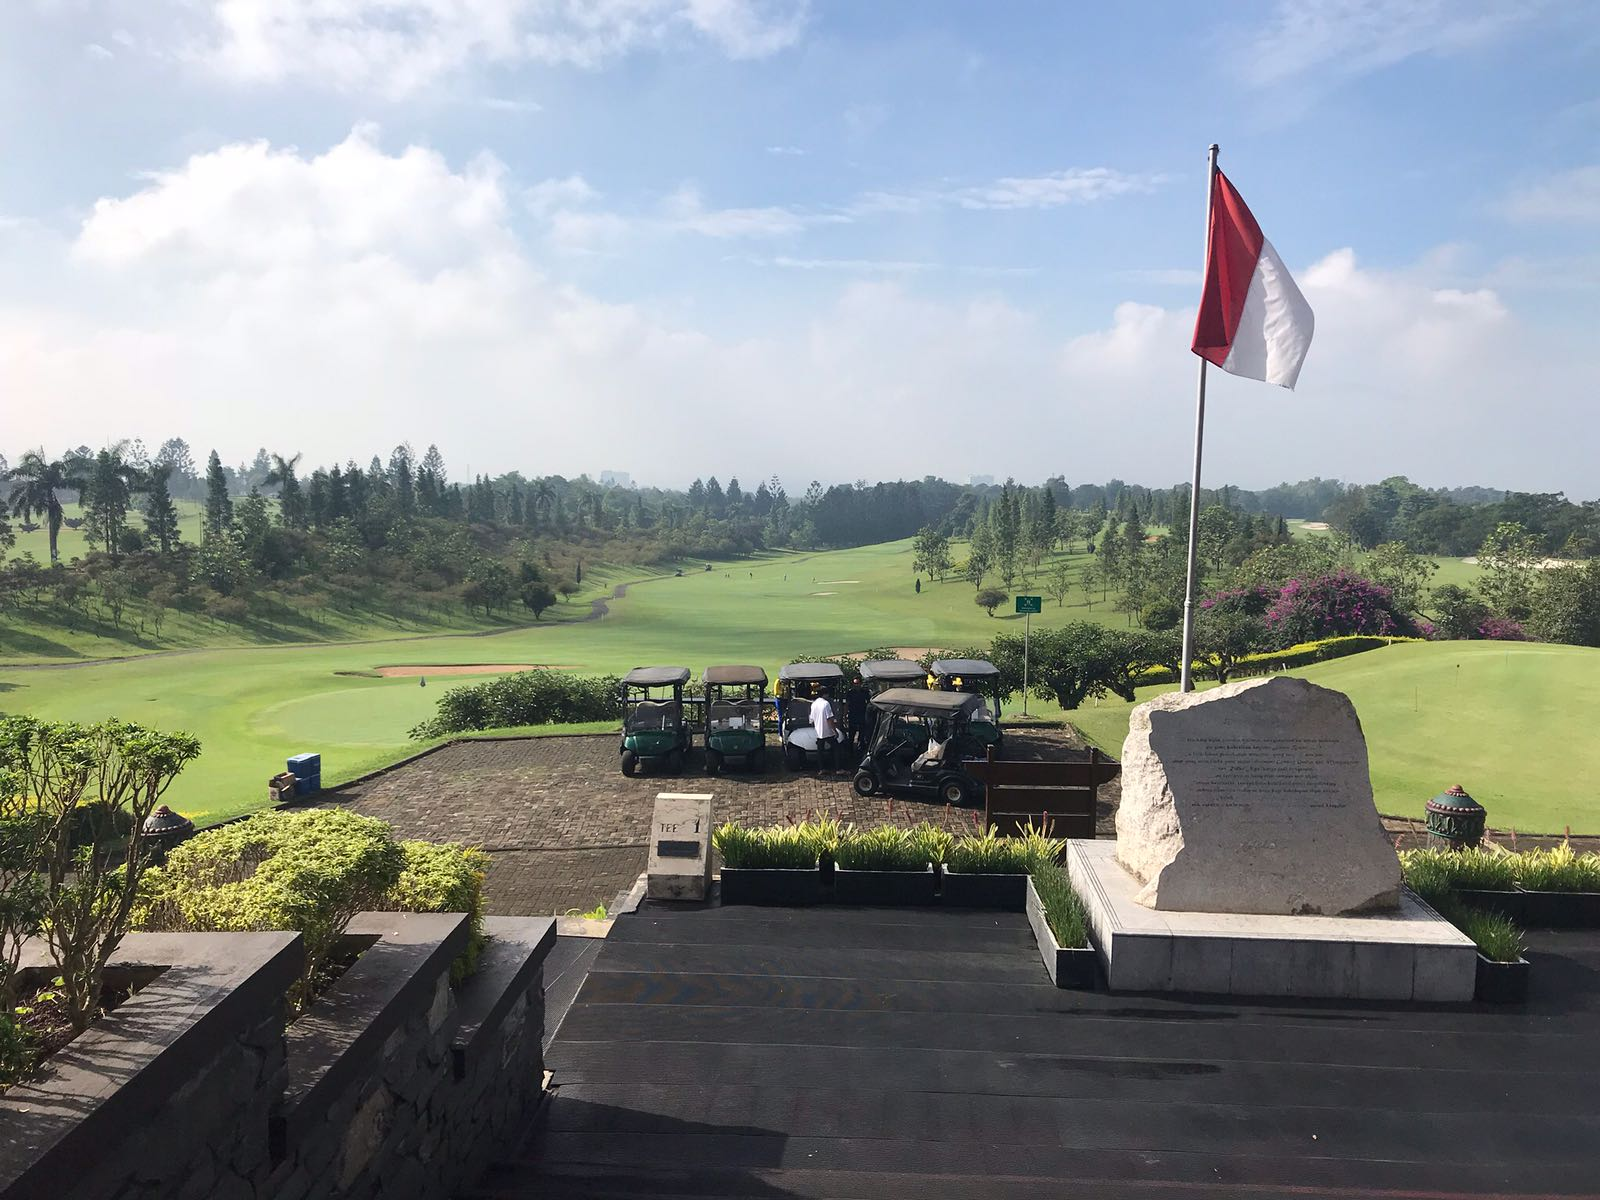

###### Golf course in Bandung - Indonesia
###### This is my first jupyter notebook with my own data over the past 3 years of golfing.

###### Goal of this exercise is to analyse the progress I am making with playing golf. 
###### Let's start with creating the data into a python dictionary.

In [1]:
# creating the data
golfdat = dict({'6/9/2017'   : 40.7 , 
                '25/9/2017'  : 28.6, 
                '3/10/2017'  : 24.8, 
                '7/10/2017'  : 28, 
                '11/10/2017' : 30.7, 
                '26/10/2017' : 28.3, 
                '11/11/2017' : 26.4, 
                '1/12/2017'  : 23.7, 
                '5/12/2017'  : 26.5, 
                '8/12/2017'  : 27.1, 
                '30/1/2018'  : 20, 
                '17/03/2018' : 28.5, 
                '28/03/2018' : 29.2, 
                '19/04/2018' : 14.9, 
                '11/05/2018' : 21.1, 
                '24/05/2018' : 22.8, 
                '2/6/2018'   : 22.1, 
                '6/9/2018'   : 24.6, 
                '2/10/2018'  : 27.3, 
                '10/11/2018' : 33.4, 
                '21/11/2018' : 23.7, 
                '04/12/2018' : 21.1, 
                '18/01/2019' : 17.3, 
                '24/01/2019' : 21, 
                '26/01/2019' : 21.1, 
                '07/03/2019' : 22, 
                '08/03/2019' : 22.7, 
                '13/03/2019' : 23.4, 
                '15/03/2019' : 22.8})

For manipulating and visualizing the data, we need to import some useful python packages.

In [2]:
# importing packages
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.dates as mdates

Transforming the dictionary into a dataframe and converting datetime column into an index. We create and calculate additional columns: average handicap per year and a consistency measure.

In [3]:
# transforming data
golfdat_df = pd.DataFrame.from_dict(data=golfdat, orient='index', columns=['hcp'])
golfdat_df.index = pd.to_datetime(golfdat_df.index, format='%d/%m/%Y')
golfdat_df['avg_yr'] = golfdat_df.groupby(golfdat_df.index.year)['hcp'].transform('mean')
golfdat_df['consistency'] = golfdat_df['hcp'] - golfdat_df['avg_yr']
golfdat_df['line'] = 0

We slice dataframe into yearly dataframes.

In [9]:
# slicing data
golfdat_19 = golfdat_df['2019']
golfdat_18 = golfdat_df['2018']
golfdat_17 = golfdat_df['2017']
print(golfdat_19)

             hcp     avg_yr  consistency  line
2019-01-18  17.3  21.471429    -4.171429     0
2019-01-24  21.0  21.471429    -0.471429     0
2019-01-26  21.1  21.471429    -0.371429     0
2019-03-07  22.0  21.471429     0.528571     0
2019-03-08  22.7  21.471429     1.228571     0
2019-03-13  23.4  21.471429     1.928571     0
2019-03-15  22.8  21.471429     1.328571     0


Based on these dataframes we dot all scores for each year, colored by year, into a graph. We also draw a line to indicate the average hcp per year. 

Text(0, 0.5, 'Handicap')

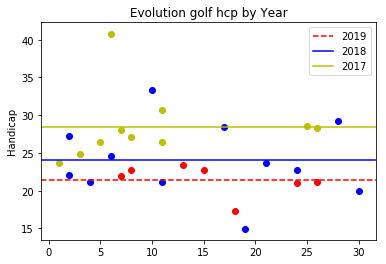

In [18]:
# plotting data
years = np.array(golfdat_df.index.year.drop_duplicates())
fig, ax = plt.subplots()
ax.scatter(golfdat_19.index.day, golfdat_19['hcp'], c='r')
ax.scatter(golfdat_18.index.day, golfdat_18['hcp'], c='b')
ax.scatter(golfdat_17.index.day, golfdat_17['hcp'], c='y')
ax.axhline(y=golfdat_19['avg_yr'][0], linestyle='--', c='r')
ax.axhline(y=golfdat_18['avg_yr'][0], linestyle='-', c='b')
ax.axhline(y=golfdat_17['avg_yr'][0], linestyle='-', c='y')
ax.set_title('Evolution golf hcp by Year')
ax.legend(['2019','2018','2017'], loc='upper right')
ax.set_ylabel('Handicap')

Consistency is a starting point in golf. Goal is to attain consistency results below the 0-line. Consistency is calculated as the difference between the score of the round and the yearly average score.

Text(0, 0.5, 'Consistency')

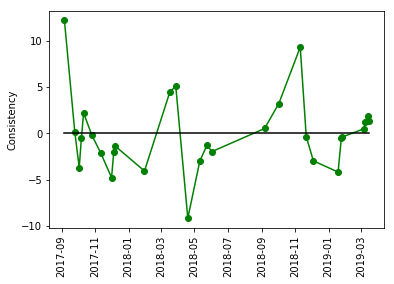

In [6]:
# plotting data
plt.plot(golfdat_df.index, golfdat_df['consistency'], c='g', marker='o')
plt.plot(golfdat_df.index, golfdat_df['line'], 'k-')
plt.xticks(rotation=90)
plt.ylabel('Consistency')

## Conclusion: there is still progress!